<a href="https://colab.research.google.com/github/Pappas313/Computational-vision/blob/main/%CE%A5%CF%80%CE%BF%CE%BB%CE%BF%CF%83%CF%84%CE%B9%CE%BA%CE%AE_%CE%8C%CF%81%CE%B1%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

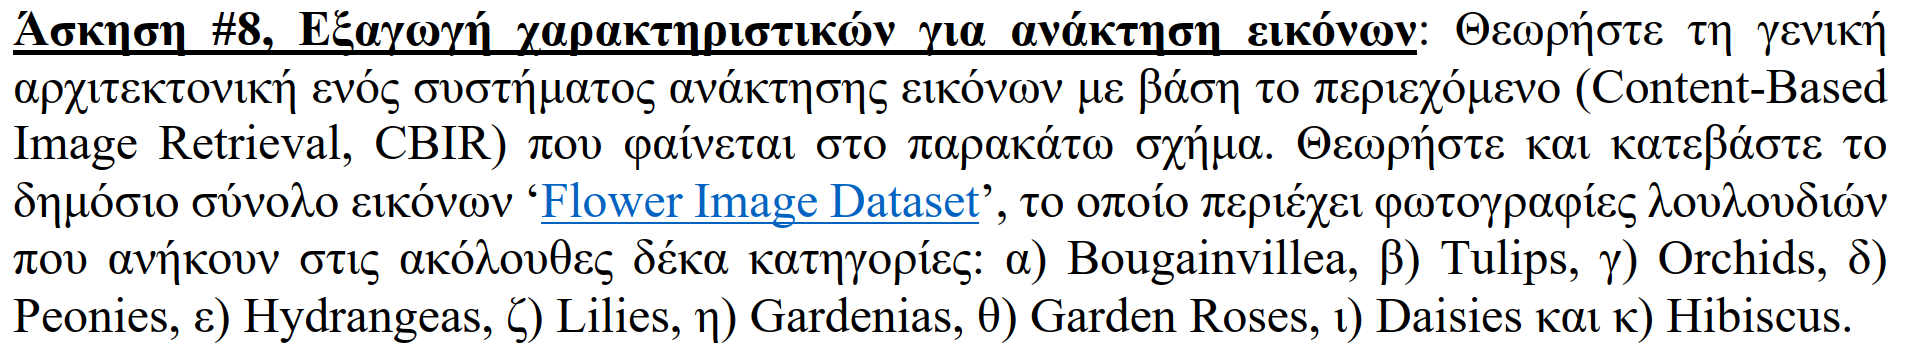

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

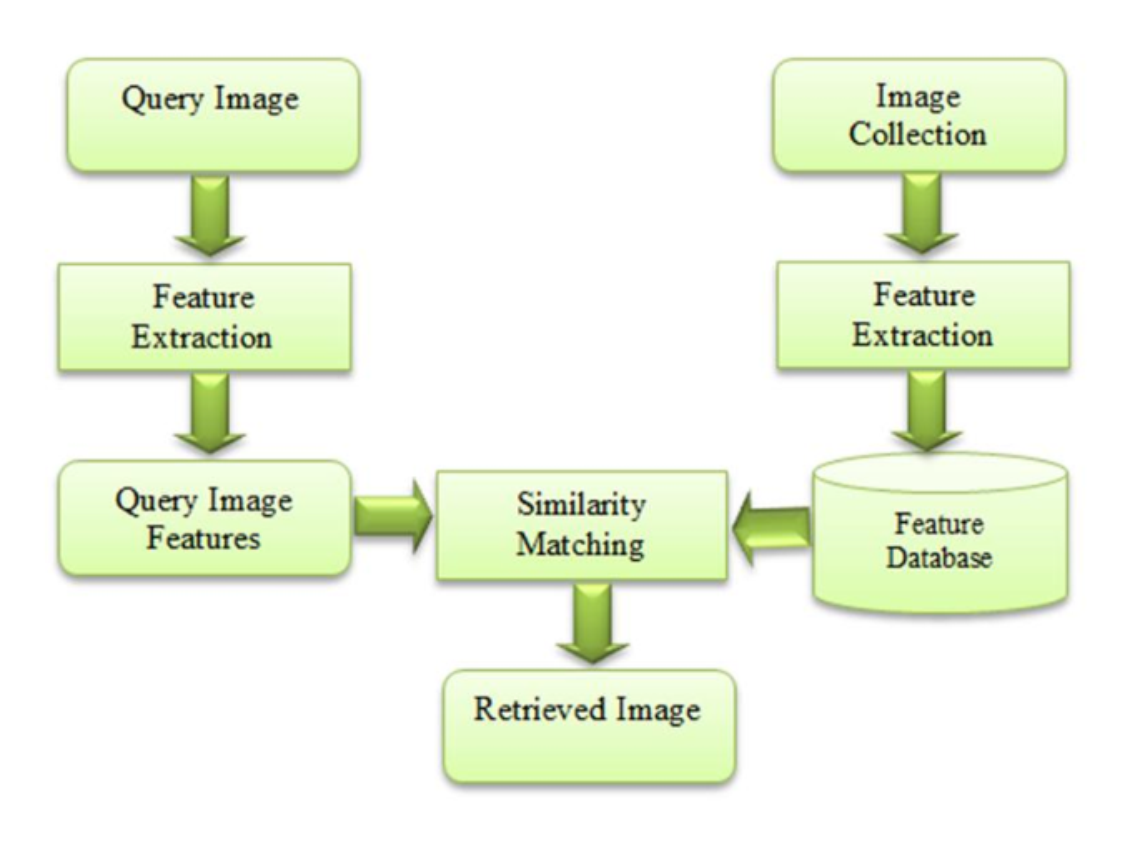

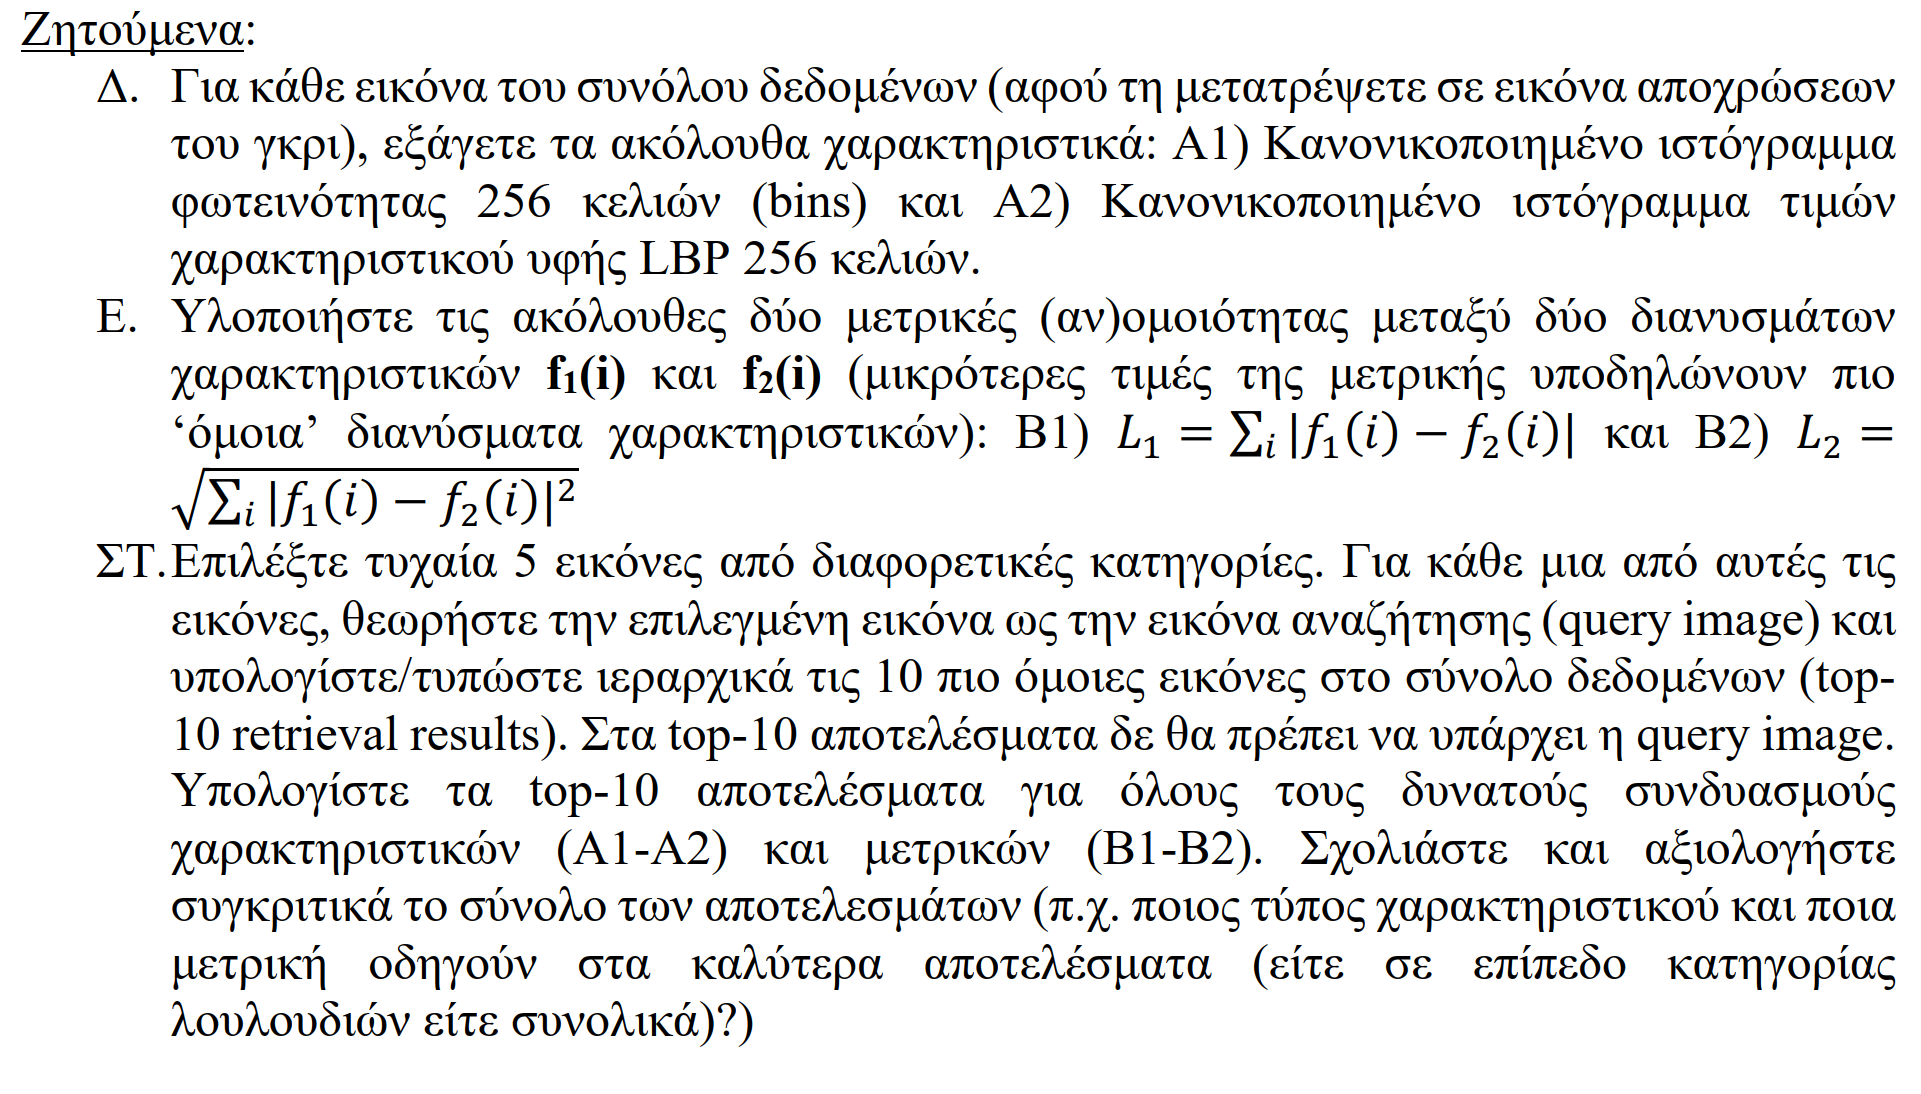

**Σημείωση**

Λόγω του πλήθους των προς επεξεργασία εικόνων, όλα τα αποτελέσματα των ερωτημάτων έχουν αποθηκευτεί ως ξεχωριστά αρχεία καθώς η εκτέλεση τους είναι αρκετά χρονοβόρα.

**Συγκεκριμενα:**

Α) Τα ιστογράμματα είναι αποθηκευμένα στο φάκελο a_histograms

B) Τα αποτελέσματα βρίσκονται στο αρχείο b_images_distances.csv

Γ) Τα ιστογράμματα είναι αποθηκευμένα στο φάκελο c_histograms και τα αποτέλσματα στο αρχείο c_results.csv. Τα αποτελέσματα στο .csv αρχείο εμφανίζονται με τη σειρά κατάταξης σύμφωνα με τη στήλη position.


Αναλύοντας τα αποτελέσματα του Γ ερωτήματος, αυτό που παρατηρείται είναι πως έχουν επιλεχθεί εικόνες με παρόμοια κατανομή στα ιστογράμματα.
Για παράδειγμα τα παρακάτω ιστογράμματα αφοροόυν τις εικόνες tulip_00048 & hibiscus_00025.
Συγκεκριμένα η tulip_00048 είναι η query image και η είναι η πρώτη εικόνα σε ομοιότητα.


In [ ]:
import cv2
import numpy as np
from sklearn.neighbors import NearestNeighbors
import os
import random
from matplotlib import pyplot as plt
import csv

def compute_normalized_intensity_histogram(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    normalized_hist = hist / float(np.sum(hist))
    return normalized_hist

def compute_normalized_lbp_histogram(image):
    lbp = cv2.calcHist([image], [0], None, [256], [0, 256], accumulate=False)
    normalized_hist = lbp / float(np.sum(lbp))
    return normalized_hist

def calculate_distances(image1, image2):
    histogram1 = compute_normalized_intensity_histogram(image1)
    histogram2 = compute_normalized_intensity_histogram(image2)

    l1_distance = np.sum(np.abs(histogram1 - histogram2))
    l2_distance = np.sqrt(np.sum((histogram1 - histogram2)**2))

    return l1_distance, l2_distance


from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/Υπολογιστική όραση/Dataset_02'

images_path = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.jpg')]

# # A
# for image_path in images_path:
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     intensity_histogram = compute_normalized_intensity_histogram(image)
#     lbp_histogram = compute_normalized_lbp_histogram(image)

#     plt.figure(1)
#     plt.subplot(2, 1, 1)
#     plt.plot(intensity_histogram, color='gray')
#     plt.title(f'Normalized Intensity Histogram - {os.path.basename(image_path)}')
#     plt.subplot(2, 1, 2)
#     plt.plot(lbp_histogram, color='gray')
#     plt.title(f'Normalized LBP Histogram - {os.path.basename(image_path)}')

#     subdirectory_name = 'a_histograms'
#     subdirectory_path = os.path.join(os.getcwd(), subdirectory_name)
#     os.makedirs(subdirectory_path, exist_ok=True)
#     histogram_filename = os.path.splitext(os.path.basename(image_path))[0] + '_histograms.png'
#     histogram_filepath = os.path.join(subdirectory_path, histogram_filename)
#     plt.savefig(histogram_filepath)
#     print(f"Histograms for {image_path} saved ({subdirectory_name}/{histogram_filename})")

# # B
# csv_filename = 'b_results.csv'
# with open(csv_filename, 'w', newline='') as csvfile:
#     csv_writer = csv.writer(csvfile)

#     csv_writer.writerow(['Image1', 'Image2', 'L1 Distance', 'L2 Distance'])

#     for i, image_path1 in enumerate(images_path):
#         for j, image_path2 in enumerate(images_path):
#             if i != j:
#                 image1 = cv2.imread(os.path.join(image_path1), cv2.IMREAD_GRAYSCALE)
#                 image2 = cv2.imread(os.path.join(image_path2), cv2.IMREAD_GRAYSCALE)

#                 l1, l2 = calculate_distances(image1, image2)
#                 csv_writer.writerow([f"{image_path1}", f"{image_path2}", l1, l2])
#                 print(f"Distance between Image {image_path1} and Image {image_path2} - L1: {l1}, L2: {l2}")

# C
images = os.listdir(folder_path)
categories = set()
random_images = []

for image in images:
    category = image.split('_')[0]
    categories.add(category)

categories = list(categories)

for category in categories:
    category_images = [image for image in images if image.startswith(category + '_')]
    selected_images = random.sample(category_images, min(5, len(category_images)))
    random_images.extend(selected_images)

for i, image_path in enumerate(random_images):
    print(f"Random Image {i+1}: {image_path} - Category: {category}")

csv_filename = 'c_results.csv'

with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['query_image', 'result_image', 'position', 'L1', 'L2'])

    os.chdir(folder_path)

    for i, query_image_path in enumerate(random_images):
        print(f"\nQuery Image {i+1}: {query_image_path} - Category: {category}")

        query_image = cv2.imread(query_image_path, cv2.IMREAD_GRAYSCALE)

        train_images = [image_path for image_path in random_images if image_path != query_image_path]

        features = []
        for image_path in train_images:
            train_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            feature = compute_normalized_intensity_histogram(train_image).flatten()
            features.append(feature)

        query_feature = compute_normalized_intensity_histogram(query_image).flatten()

        neighbors_model = NearestNeighbors(n_neighbors=10, metric='euclidean')  # Μετρική cosine similarity
        neighbors_model.fit(features)

        distances, indices = neighbors_model.kneighbors([query_feature])

        print("Top-10 Retrieval Results:")
        for j, index in enumerate(indices.flatten()):
            result_image_path = train_images[index]
            result_image = cv2.imread(os.path.join(result_image_path), cv2.IMREAD_GRAYSCALE)

            query_image_intensity_histogram = compute_normalized_intensity_histogram(query_image)
            query_image_lbp_histogram = compute_normalized_lbp_histogram(query_image)

            result_image_intensity_histogram = compute_normalized_intensity_histogram(result_image)
            result_image_lbp_histogram = compute_normalized_lbp_histogram(result_image)

            plt.figure(1, figsize=(12, 10))
            plt.subplot(2, 2, 1)
            plt.plot(query_image_intensity_histogram, color='gray')
            plt.title(f'Normalized Intensity Histogram (query_image) - {os.path.basename(query_image_path)}')
            plt.subplot(2, 2, 2)
            plt.plot(query_image_lbp_histogram, color='gray')
            plt.title(f'Normalized LBP Histogram (query_image) - {os.path.basename(query_image_path)}')
            plt.subplot(2, 2, 3)
            plt.plot(result_image_intensity_histogram, color='gray')
            plt.title(f'Normalized Intensity Histogram (result_image) - {os.path.basename(result_image_path)}')
            plt.subplot(2, 2, 4)
            plt.plot(result_image_lbp_histogram, color='gray')
            plt.title(f'Normalized LBP Histogram (result_image) - {os.path.basename(result_image_path)}')

            subdirectory_name = '../c_histograms'
            subdirectory_path = os.path.join(os.getcwd(), subdirectory_name)
            os.makedirs(subdirectory_path, exist_ok=True)
            histogram_filename = os.path.splitext(os.path.basename(query_image_path))[0] + '_' + os.path.splitext(os.path.basename(result_image_path))[0] + '_' + str(j+1) + '_histograms.png'
            histogram_filepath = os.path.join(subdirectory_path, histogram_filename)
            plt.savefig(histogram_filepath)

            l1, l2 = calculate_distances(query_image, result_image)

            print(f"{j+1}. {result_image_path} - L1: {l1}, L2: {l2}")

            csv_writer.writerow([query_image_path, result_image_path, j+1, l1, l2])




Mounted at /content/drive
Random Image 1: bougainvillea_00027.jpg - Category: hibiscus
Random Image 2: bougainvillea_00057.jpg - Category: hibiscus
Random Image 3: bougainvillea_00032.jpg - Category: hibiscus
Random Image 4: bougainvillea_00025.jpg - Category: hibiscus
Random Image 5: bougainvillea_00053.jpg - Category: hibiscus
Random Image 6: a_histograms - Category: hibiscus
Random Image 7: lilies_00002.jpg - Category: hibiscus
Random Image 8: lilies_00062.jpg - Category: hibiscus
Random Image 9: lilies_00052.jpg - Category: hibiscus
Random Image 10: lilies_00005.jpg - Category: hibiscus
Random Image 11: lilies_00025.jpg - Category: hibiscus
Random Image 12: hydrangeas_00029.jpg - Category: hibiscus
Random Image 13: hydrangeas_00017.jpg - Category: hibiscus
Random Image 14: hydrangeas_00006.jpg - Category: hibiscus
Random Image 15: hydrangeas_00030.jpg - Category: hibiscus
Random Image 16: hydrangeas_00046.jpg - Category: hibiscus
Random Image 17: garden_roses_00038.jpg - Category: 

AttributeError: 'NoneType' object has no attribute 'flatten'